Data Shape: (187, 13)

Data Summary:
           Confirmed         Deaths     Recovered        Active     New cases  \
count  1.870000e+02     187.000000  1.870000e+02  1.870000e+02    187.000000   
mean   8.813094e+04    3497.518717  5.063148e+04  3.400194e+04   1222.957219   
std    3.833187e+05   14100.002482  1.901882e+05  2.133262e+05   5710.374790   
min    1.000000e+01       0.000000  0.000000e+00  0.000000e+00      0.000000   
25%    1.114000e+03      18.500000  6.265000e+02  1.415000e+02      4.000000   
50%    5.059000e+03     108.000000  2.815000e+03  1.600000e+03     49.000000   
75%    4.046050e+04     734.000000  2.260600e+04  9.149000e+03    419.500000   
max    4.290259e+06  148011.000000  1.846641e+06  2.816444e+06  56336.000000   

        New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
count   187.000000     187.000000          187.000000             187.000000   
mean     28.957219     933.812834            3.019519              64.820535   
s

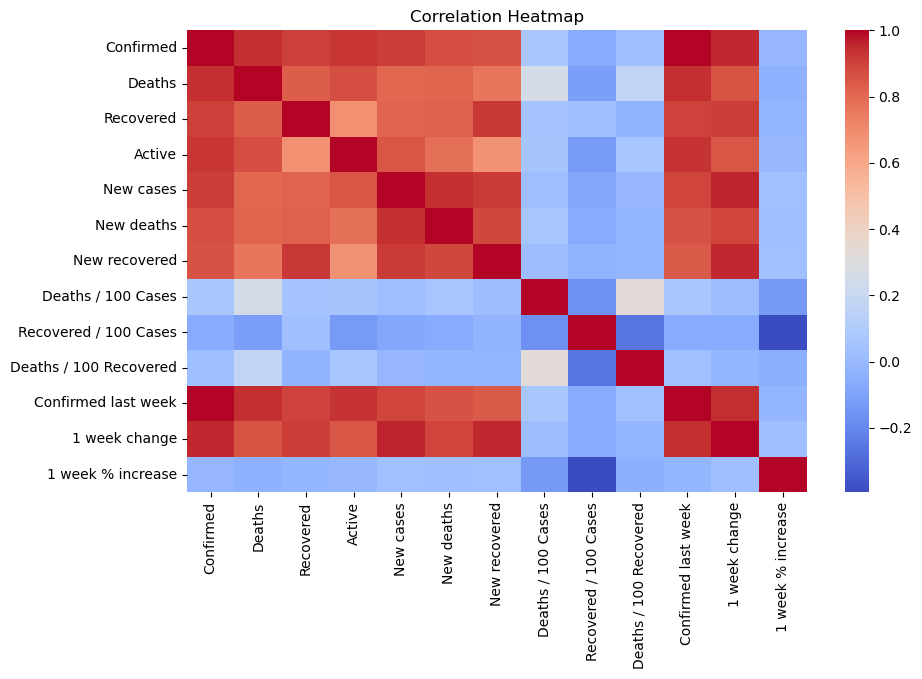

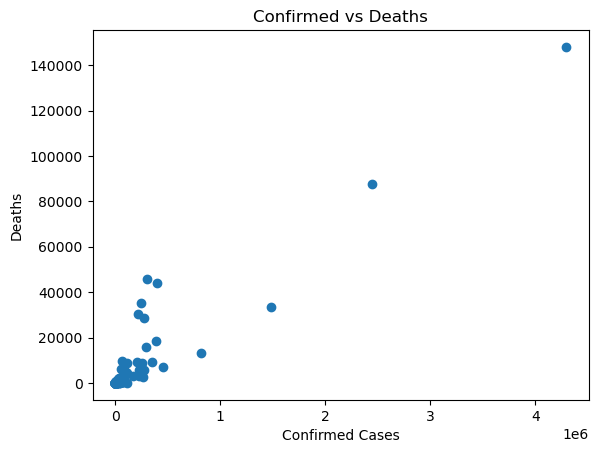


Linear Regression Performance:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R²: 1.0000

Random Forest Performance:
MAE: 2974.55
MSE: 45869292.36
RMSE: 6772.69
R²: 0.4650

Cross-Validation R² (Linear Regression): 1.0
Cross-Validation R² (Random Forest): 0.690482302576472


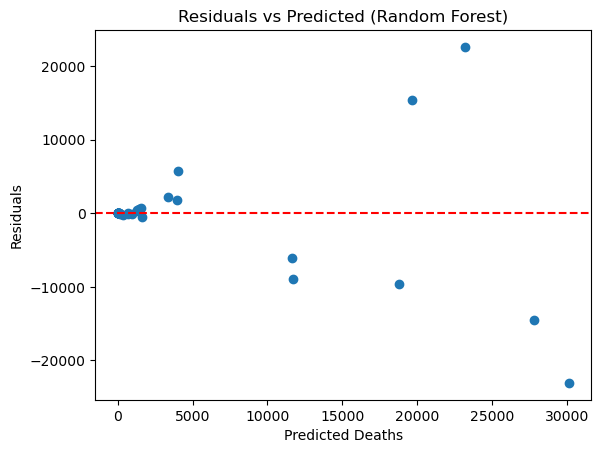

In [1]:
# ===============================================================
# COVID-19 Regression Project (Unit II + VI)
# Predicting 'Deaths' using Regression + Model Performance methods
# ===============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# 1. Load and Preprocess Data
# ----------------------------
df = pd.read_csv("D:\\COVID\\country_wise_latest.csv")

# Drop non-numeric and non-relevant columns
data = df.drop(columns=["Country/Region", "WHO Region"], errors='ignore')

# Replace infinite and missing values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.median(), inplace=True)

# Define features and target
X = data.drop(columns=["Deaths"])
y = data["Deaths"]

# Split data (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 2. Exploratory Data Analysis (EDA)
# ----------------------------
print("Data Shape:", data.shape)
print("\nData Summary:\n", data.describe())

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Relationship between Confirmed and Deaths
plt.scatter(data["Confirmed"], data["Deaths"])
plt.xlabel("Confirmed Cases")
plt.ylabel("Deaths")
plt.title("Confirmed vs Deaths")
plt.show()

# ----------------------------
# 3. Regression Models
# ----------------------------

# --- Model 1: Multiple Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

# --- Model 2: Random Forest Regression (Ensemble - Bagging) ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ----------------------------
# 4. Model Performance Evaluation
# ----------------------------
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    return r2

r2_lr = evaluate_model(y_test, y_pred_lr, "Linear Regression")
r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

# ----------------------------
# 5. Cross-Validation (Unit VI)
# ----------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_lr = cross_val_score(lin_reg, X, y, cv=kf, scoring='r2')
cv_rf = cross_val_score(rf, X, y, cv=kf, scoring='r2')

print("\nCross-Validation R² (Linear Regression):", cv_lr.mean())
print("Cross-Validation R² (Random Forest):", cv_rf.mean())

# ----------------------------
# 6. Bias-Variance Discussion
# ----------------------------
# Plot residuals for Random Forest
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Deaths")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Random Forest)")
plt.show()
